### IDs:
Insert yours IDs to the cell below

ID #1: 324369412

ID #2: 316420132


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define file path
csv_path = "AMI_GSE66360_series_matrix.csv"  # Update with the correct path

# Read the CSV file starting from the 60th line
df = pd.read_csv(csv_path, skiprows=59, index_col=0, encoding="utf-8", low_memory=False)

# Remove the first row by position
df = df.iloc[1:].reset_index(drop=True)

In [29]:
# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54675 entries, 0 to 54674
Data columns (total 99 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   H       54674 non-null  object
 1   H.1     54674 non-null  object
 2   H.2     54675 non-null  object
 3   H.3     54674 non-null  object
 4   H.4     54674 non-null  object
 5   H.5     54675 non-null  object
 6   H.6     54674 non-null  object
 7   H.7     54675 non-null  object
 8   H.8     54674 non-null  object
 9   H.9     54674 non-null  object
 10  H.10    54673 non-null  object
 11  H.11    54674 non-null  object
 12  H.12    54673 non-null  object
 13  M       54674 non-null  object
 14  M.1     54675 non-null  object
 15  M.2     54675 non-null  object
 16  M.3     54675 non-null  object
 17  M.4     54675 non-null  object
 18  M.5     54674 non-null  object
 19  M.6     54673 non-null  object
 20  M.7     54675 non-null  object
 21  M.8     54675 non-null  object
 22  M.9     54675 non-null

In [30]:
# Show the first few rows
print(df.head())

             H          H.1          H.2          H.3          H.4  \
0  5.866377893  4.948736331  5.148384393  5.064418945  5.017832878   
1   8.22579012  7.525865369  7.764636529  7.198461482  7.831450258   
2   6.17973231  6.628137025  5.859151477  5.974135101  6.793079158   
3  6.179477974   6.58288903  6.602134766  6.545904723  5.911542321   
4  2.792047952   2.69571445  2.580181122  2.712123845  2.723686912   

           H.5          H.6          H.7          H.8          H.9  ...  \
0  5.116153518  5.431328058  5.235270857  5.773528455  6.016415473  ...   
1  7.203591859  7.694550756  7.760259212  8.279814404  7.580840863  ...   
2   6.43522914  6.320546126   6.48359047  6.387779205  6.307065808  ...   
3   6.28542026  6.562315839  6.345887555   6.27280582  5.971847425  ...   
4   2.70668403  2.674746672  2.635149735  2.696649177  2.802862883  ...   

          M.39         M.40         M.41         M.42         M.43  \
0  5.419481538  5.057716465  5.996493392  5.343132759  5.5

In [31]:
# Number of genes (rows)
num_genes = df.shape[0]

print(f"Number of genes profiled: {num_genes}")

Number of genes profiled: 54675


In [32]:
# Number of samples (columns)
num_samples = df.shape[1]

print(f"Total number of samples: {num_samples}")

Total number of samples: 99


In [33]:
healthy_samples = [col for col in df.columns if "H" in col]  # Adjust if needed
mi_samples = [col for col in df.columns if "M" in col]  # Adjust if needed

print(f"Samples in class 'Healthy' (H): {len(healthy_samples)}")
print(f"Samples in class 'Myocardial Infarction' (M): {len(mi_samples)}")

Samples in class 'Healthy' (H): 50
Samples in class 'Myocardial Infarction' (M): 49


In [34]:
# Remove rows (genes) with any missing values
df_cleaned = df.dropna()

# Count remaining genes
num_genes_remaining = df_cleaned.shape[0]

print(f"Number of genes after removing missing values: {num_genes_remaining}")

Number of genes after removing missing values: 54628


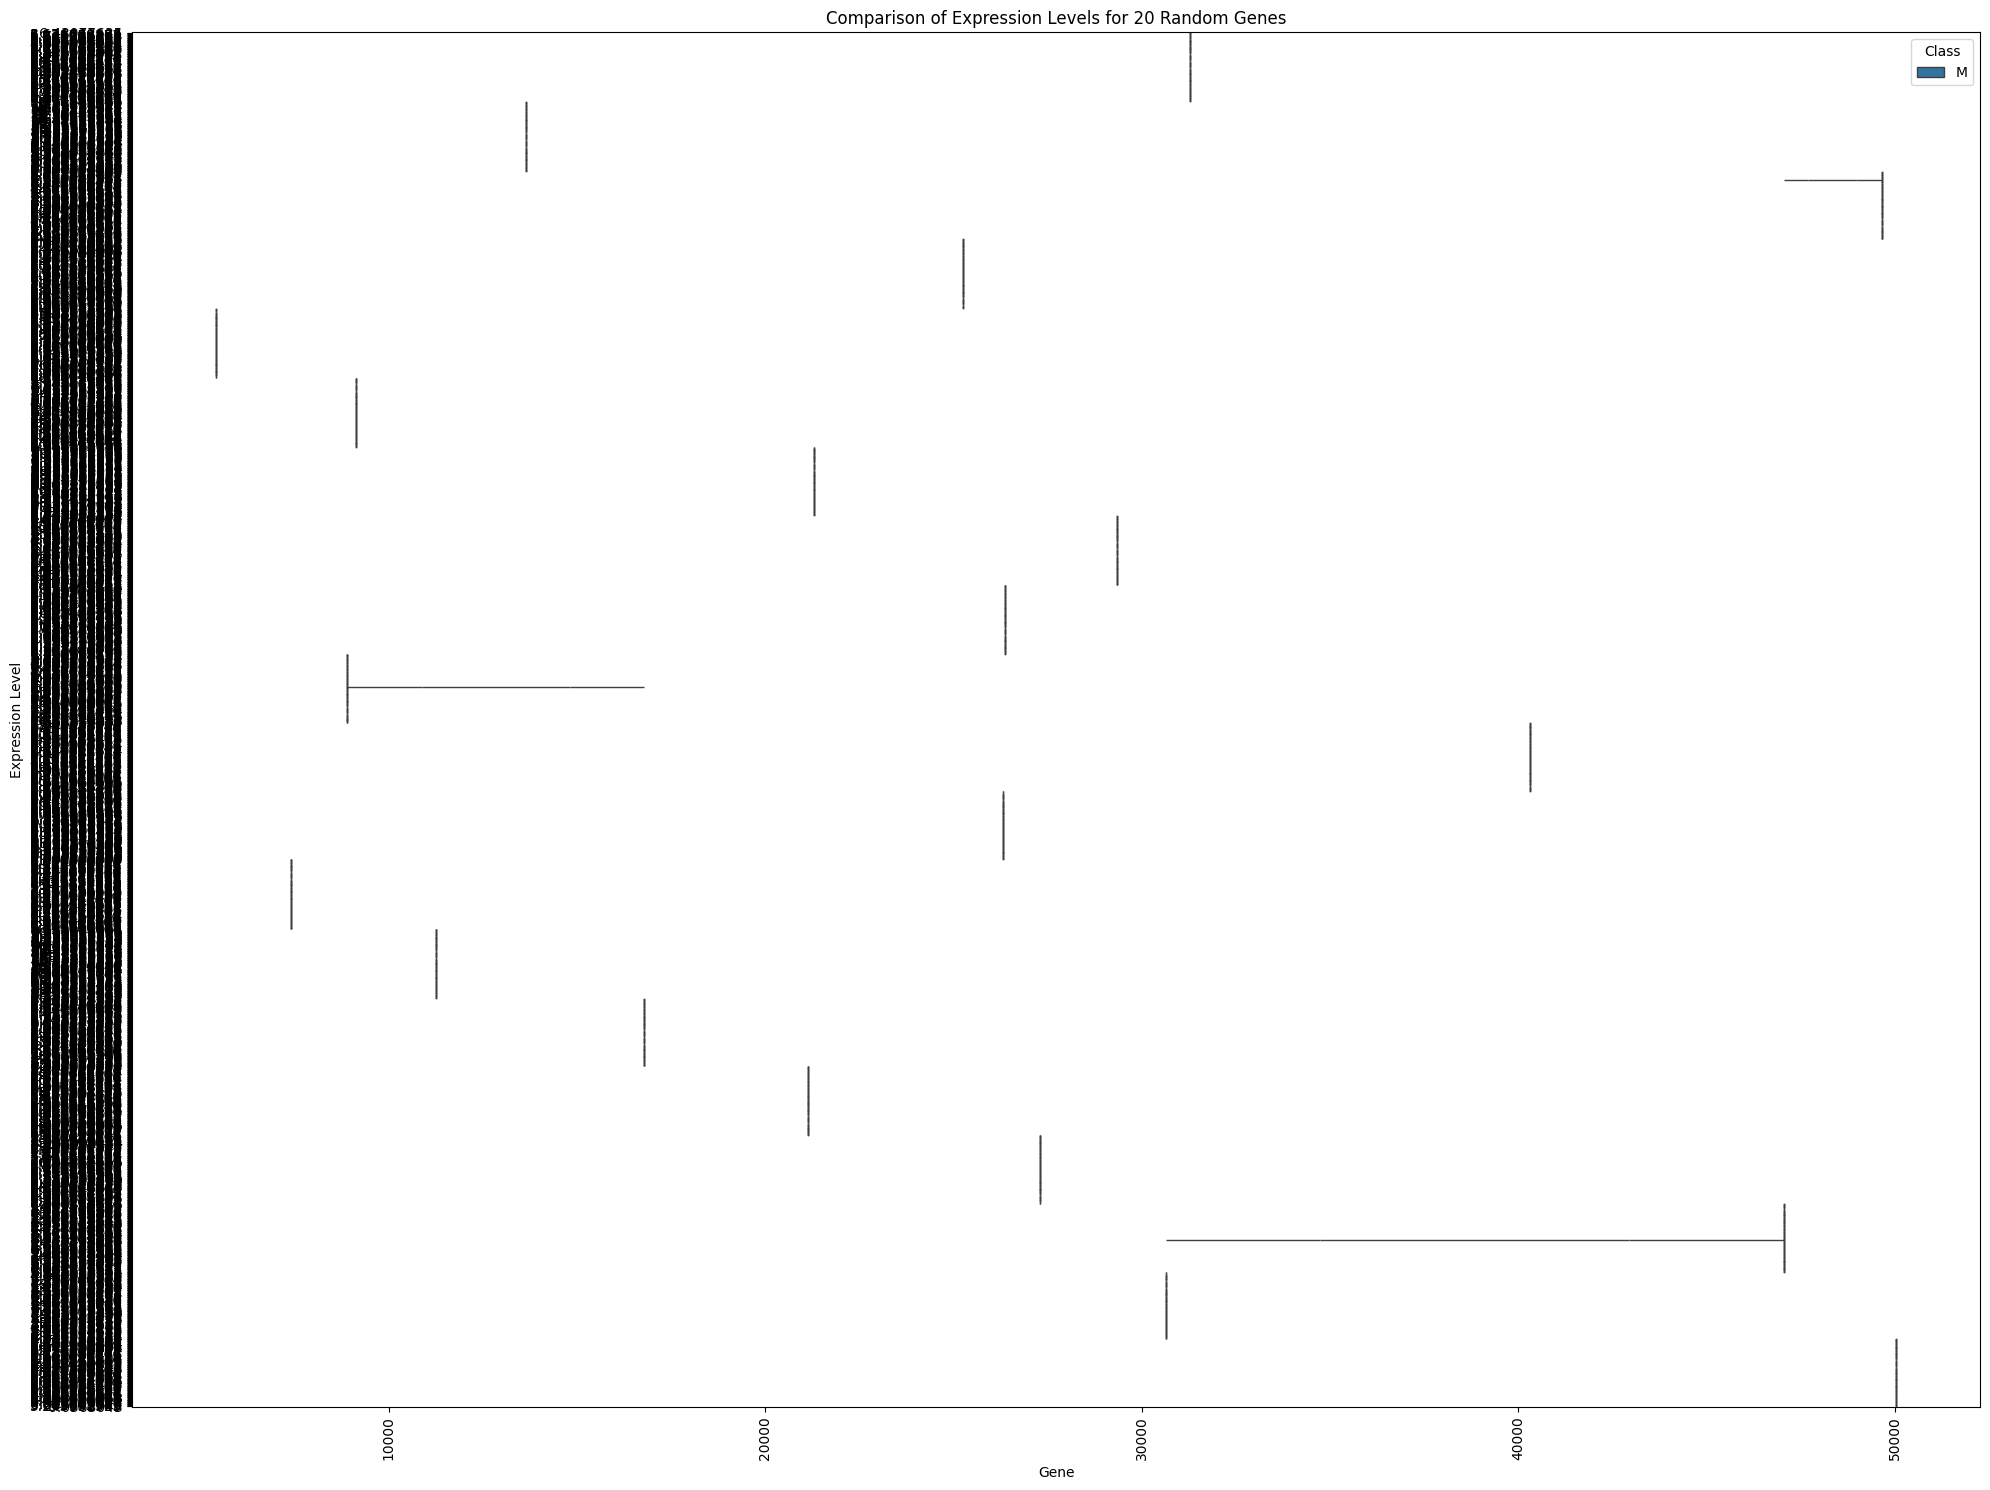

In [37]:
# Assuming df is your DataFrame, and the first column (ID_REF) is the gene names
# Extract gene names (assuming the first column is the gene names)
gene_names = df.index

# Randomly select 20 gene names
random_genes = np.random.choice(gene_names, size=20, replace=False)

# Create a new DataFrame to hold the selected genes' expression data for M and H
selected_genes_data = df.loc[random_genes]

# Reshape the data to have two columns: gene expression and class (H or M)
reshaped_data = selected_genes_data.T.reset_index()
reshaped_data = pd.melt(reshaped_data, id_vars=["index"], var_name="Gene", value_name="Expression")

# Add the class column (H or M) based on the column names
reshaped_data['Class'] = reshaped_data['Gene'].apply(lambda x: 'H' if 'H' in x else 'M')

# Set up the plotting environment
plt.figure(figsize=(20, 15))

# Create the boxplots
sns.boxplot(data=reshaped_data, x='Gene', y='Expression', hue='Class')

# Rotate x-axis labels to make them readable
plt.xticks(rotation=90)

# Set plot labels and title
plt.xlabel('Gene')
plt.ylabel('Expression Level')
plt.title('Comparison of Expression Levels for 20 Random Genes')

# Show the plot
plt.tight_layout()
plt.show()